# (Slide TypeFord GoBike Data Analysis)
## by (Noha Moubarak)

## Introduction
> GoBike is a sharing bicycle  system for bicycle  riders by Bay Wheels stations and bikes are available throughout San Francisco, the East Bay, and San Jose.

## Preliminary Wrangling

> This dataset contains GoBike Data with all details of riders in 2017 we will explore it.

## Import modules and libraries

In [25]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

## Load the dataset

In [26]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
display(df.head())

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
#check duplicate value
df.duplicated().sum()

0

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [7]:
# Check if there is missing values exist
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

## Assessing Data

Quality Issues:

    1- start_time and end_time should be datetime datatype
    2- start_station_id and end_station_id should be object datatype
    3- member_birth_year should be integer datatype
    4- Calculate age of member and create new column for it using member_birth_year
    5-Calculate distance between stations using latitude and longitude points.

In [27]:
# Create copy of the data before we clean it
df_copy = df.copy()

In [9]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


## Define:
- Convert start_time and endtime to datetime datatype using to_datetime() function
- Convert start_station_id and end_station_id to object datatype using astype() function
- Fill missing values with 0000 using fillna() and convert member_birth_year to int using astype() function
- Calculate age of member by subtracting birth year from current year
- The member_gender column has various values for Male, Female and Other such as M, F, O and ? We will replace M by Male, F by Female and O and ? by Other using the replace function.

## Code:

In [28]:
#Convert start_time and endtime to datetime datatype using to_datetime() function
df_copy['start_time'] = pd.to_datetime(df_copy.start_time)
df_copy['end_time'] = pd.to_datetime(df_copy.end_time)

In [29]:
#Convert start_station_id and end_station_id to object datatype using astype() function
df_copy['start_station_id'] = df_copy['start_station_id'].astype('object')
df_copy['end_station_id'] = df_copy['end_station_id'].astype('object')

In [30]:
# We fill missing values for member birth year with '0000'
df_copy['member_birth_year'] = df_copy['member_birth_year'].fillna('0000')
# Convert member birth year to int datatype
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int64')

In [31]:
# Calculate age of member by subtracting birth year from current year 2017
df_copy['age'] = 2017 - df_copy['member_birth_year']

# We replace the age for members that not found with 0
df_copy['age'] = df_copy['age'].replace(2017,0)

In [32]:
# We will replace M by Male, F by Female and O and ? by Other using the replace function.
df_copy['member_gender'] = df_copy['member_gender'].replace('M','Male')
df_copy['member_gender'] = df_copy['member_gender'].replace('F','Female')
df_copy['member_gender'] = df_copy['member_gender'].replace('O','Other')
df_copy['member_gender'] = df_copy['member_gender'].replace('?','Other')

In [10]:
df_copy['member_gender'].value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

## test Dataset:

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          519700 non-null int64
member_gender              453238 non-null object
age                        519700 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(4), object(6)
memory usage: 

In [17]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,30
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,52
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0,NaN,0
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,0,NaN,0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,20


- we need to know the most riders age and the outliers

In [18]:
df_copy['age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    519700.000000
mean         31.909659
std          15.681061
min           0.000000
10%           0.000000
20%          25.000000
30%          28.000000
40%          30.000000
50%          33.000000
60%          35.000000
70%          39.000000
75%          41.000000
80%          44.000000
90%          50.000000
95%          55.000000
max         131.000000
Name: age, dtype: float64

- Clean outliers more than 60 years old

In [33]:
df_copy=df_copy[ df_copy['age'] <=60 ]

In [20]:
df_copy.shape

(507808, 16)

### What is the structure of your dataset?

> Dataset contains 16 columns and 507808 rows.

### What is/are the main feature(s) of interest in your dataset?

> Data set contains all 2017 data
  the main feature from my point of view is ordered by periority:
  - age of riders.
  - months of rides to know the  most months the riders used to do this activity in.
  - the gender of riders to know which like this activity Man, women or kids.
  - the user type. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  - the birthdate to calculate the age.
>  - the start time to calculate the distribution in months and weekdays.

## Univariate Exploration

> In this section, i will start to investigate the main variables and the relation between nomber of rides and them like age,months,gender with user type.

## 1st variable: Age
> Find age distribution to know the most age range like to do this activity

## what is most age use this activity ?

### Number of rides by user age

In [34]:
sns.set_style('darkgrid')
sns.set_context("paper")

Text(0.5, 1.0, 'Numbers of rides by User Age')

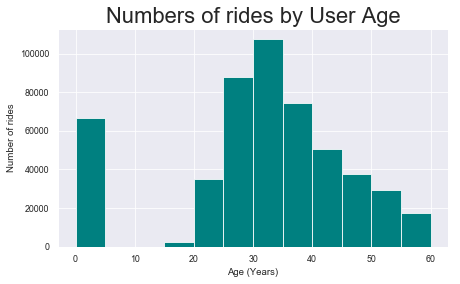

In [22]:
plt.figure(figsize = [7,4])
bin_edges = np.arange(0,df_copy['age'].max()+1,5)
plt.hist(data = df_copy, x='age', bins=bin_edges,color = 'teal')
plt.xlabel('Age (Years)')
plt.ylabel('Number of rides')
plt.title('Numbers of rides by User Age', fontsize = 22)

- we execluded abve riders more than 60 age from dataset as they small percentage

#### Clean:

- we will exceclude zero age to see the distribution of age as we see below the age from 15 to 60 and save it in df_copy_0_60 dataset

In [35]:
df_copy_0_60=df_copy[ df_copy['age'] >0 ]

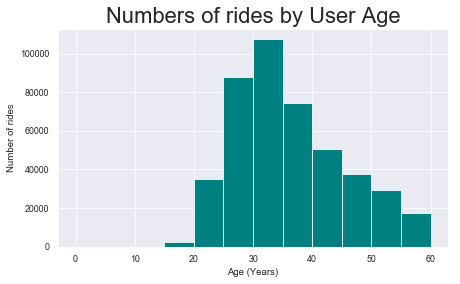

In [24]:
plt.figure(figsize = [7,4])
bin_edges = np.arange(0,df_copy_0_60['age'].max()+1,5)
plt.hist(data = df_copy_0_60, x='age', bins=bin_edges,color = 'teal')
plt.xlabel('Age (Years)')
plt.ylabel('Number of rides')
plt.title('Numbers of rides by User Age', fontsize = 22)
plt.savefig('img01.png');

- We can find that the most age users between 30 - 35

## 2nd Variable: Gender
> want to know the most gender riders

## which most gender like to do this activity?

### Number of riders by User Gender

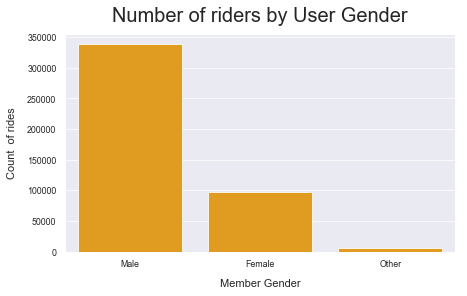

In [25]:
plt.figure(figsize = [7,4])
sns.countplot(data = df_copy, x = 'member_gender',color = 'orange')
plt.title("Number of riders by User Gender", fontsize=20, y=1.03)
plt.xlabel("Member Gender", fontsize=11, labelpad=10)
plt.ylabel("Count  of rides", fontsize=11, labelpad=10)
plt.savefig('img02.png');

- as we see above th most rides from men than women  and kids, so male like this activity to do

## 3rd Variable: Months
> want to know the number of rides distribution over months to know the most month that riders like to do this activity in it

## Which months the riders prefere to do this activity?

### Number of riders per Month

In [36]:
# Generate Month column to use it in months chart.
df_copy['start_time_month'] = df_copy['start_time'].dt.strftime('%y' + '-' + '%m')

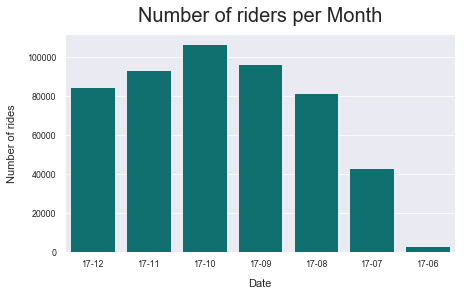

In [27]:
plt.figure(figsize = [7,4])
sns.countplot(data = df_copy, x = 'start_time_month', color = 'teal')
plt.title("Number of riders per Month", fontsize=20, y=1.03)
plt.xlabel("Date", fontsize=11, labelpad=10)
plt.ylabel("Number of rides", fontsize=11, labelpad=10)
plt.savefig('img03.png');

- from the above chart months distribution we can find that the most month have alot of ride is October may be because of weather

## 4th Variable: Weeks
> to need the distribution of rides number during the weekdays and weekends to know which most days riders prefere to do this activity in

## What is the most day in week the rider prefere to do this activity?

In [38]:
df_copy['start_time_week'] = df_copy['start_time'].dt.weekday

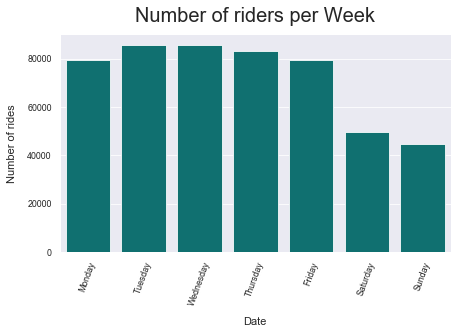

In [29]:
plt.figure(figsize = [7,4])
sns.countplot(data = df_copy, x = 'start_time_week', color = 'teal')
plt.title("Number of riders per Week", fontsize=20, y=1.03)
plt.xlabel("Date", fontsize=11, labelpad=10)
plt.ylabel("Number of rides", fontsize=11, labelpad=10)
plt.xticks(np.arange(0,7,1),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 70)
plt.savefig('img04.png');

- from the above plot we can say that riders prefere to do this activity during weekdays than weekends

### 5th Variable: User Type
> we want to know which user type use this activity (customers or subscribers)

## What is the most user type do this activity? 

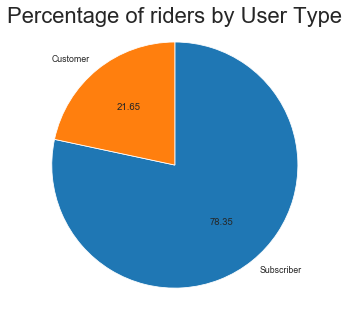

In [30]:
plt.figure(figsize = [8,5])
sorted_counts =df_copy['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = '%.2f')
plt.axis('square')
plt.title('Percentage of riders by User Type', fontsize = 22)
plt.savefig('img05.png')

- My observation from  the previous chart is the subscribers percentage is more than 75% and the rset for customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is no unusual points
> I need to extract month and weeks from date from start_time 
> I need to extract year from riders birthdate to calculate their age

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i removed ages more than 60 and zero which is no year found so the range of age is between 15 and 60

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables shown above 
 like month and gender with months

## What is the most gender use this activity in each month?

### 1st: I will add user gender to the month distribution

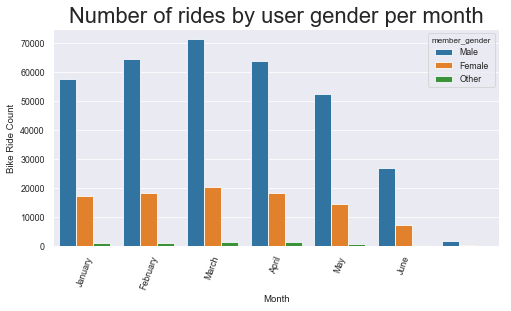

In [31]:
plt.figure(figsize = [8,4])
sb.countplot(data = df_copy, x = 'start_time_month',hue = 'member_gender')
plt.xlabel('Month')
plt.ylabel('Bike Ride Count')
plt.title('Number of rides by user gender per month', fontsize = 22)
plt.xticks(np.arange(0,6,1),['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 70)
plt.savefig('img06.png')

- After adding gender to the onths we found that number of rides by male is more than female in every month

## What is number of rides by user type in each week day?

### 2nd: I will add user type with weeks 

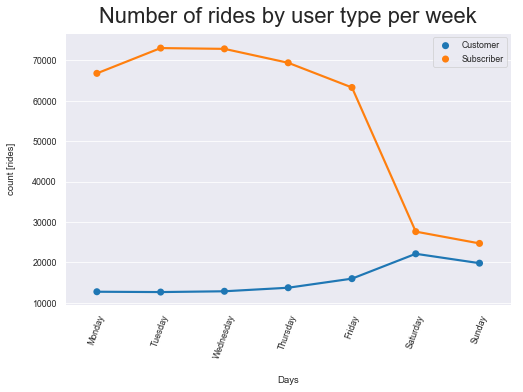

In [37]:
plt.figure(figsize = [8,5])
user_type_count_per_year_df = df_copy.groupby(["start_time_week", "user_type"]).size().reset_index()
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time_week', y=0, hue='user_type',  data=user_type_count_per_year_df)
plt.title('Number of rides by user type per week', fontsize=22, y=1.015)
plt.xlabel('Days', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
plt.xticks(np.arange(0,7,1),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 70)
plt.savefig('img07.png')

- we see that during weekends about of 75% of users is subscribers, but weekends subscribers more than customers by almost 10% only


- we can say that in different way, the subscribers rides  during weekdays is more than weekends,and customers rides increase in weekends more than weekdays

## What is the number rides per gender in each day?

### 3rd: I will add user Gender with week days

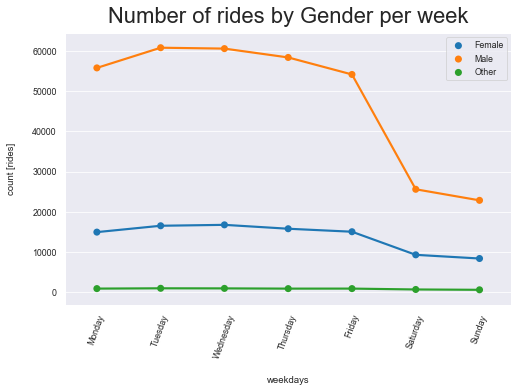

In [38]:
plt.figure(figsize = [8,5])
user_type_count_per_year_df = df_copy.groupby(["start_time_week", "member_gender"]).size().reset_index()
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time_week', y=0, hue='member_gender',  data=user_type_count_per_year_df)
plt.title('Number of rides by Gender per week', fontsize=22, y=1.015)
plt.xlabel('weekdays', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
plt.xticks(np.arange(0,7,1),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 70)
plt.savefig('img08.png')

- we can see that number of men increase suddenly in weekdays from 15000 to 60000 ,but the women increase little bit in weedays from about 10000 to almost 18000 that indicates that high percentage of men prefer the activity in weekdays more than women.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  After adding gender to the onths we found that number of rides by male is more than female in every month
>  we see that during weekends about of 75% of users is subscribers, but weekends subscribers more than customers by almost 10% only
> - we can say that in different way, the subscribers rides  during weekdays is more than weekends,and customers rides increase in weekends more than weekdays
>  we can see that number of men increase suddenly in weekdays from 15000 to 60000 ,but the women increase little bit in weedays from about 10000 to almost 18000 that indicates that high percentage of men prefer the activity in weekdays more than women.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the subscribers rides  during weekdays is more than weekends,and customers rides increase in weekends more than weekdays

## Multivariate Exploration

> adding three previous variable together in the below plots to make some analysis

## What is the total number of rides per user type per gender?

### 1st: i will use number of gender with user type 

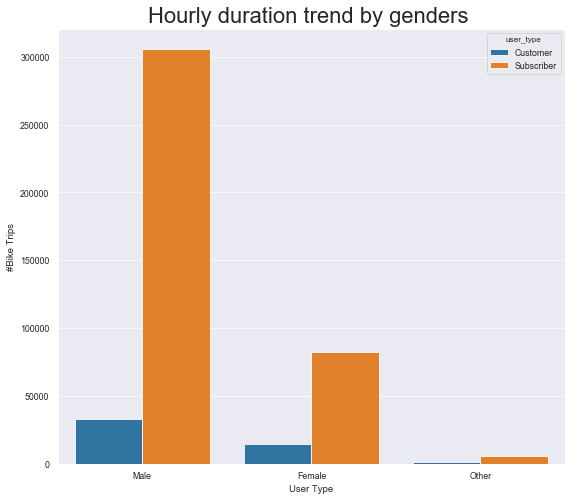

In [41]:
plt.figure(figsize = [20, 8])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_copy, x="member_gender", hue="user_type", order=df_copy.member_gender.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');
plt.title('Hourly duration trend by genders ', fontsize=22)
plt.savefig('img09.png');

- From the above plot i can say that number of male subscribers more than numbers of women subscribers and male subscribers is more than customers male 

## What is the most age range use this activity and what is their duration?

### 2nd: adding Age  to duration of customers to know the relationship between them

In [16]:
df_copy['duration_min'] = df_copy['duration_sec']/60

In [17]:
df_copy_Customers=df_copy[df_copy['user_type'] == 'Customer']  

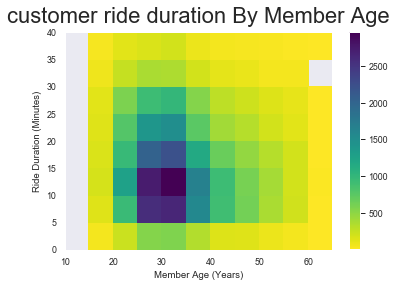

In [19]:
bins_x = np.arange(10, 65+1, 5)
bins_y = np.arange(0, 45, 5)
plt.hist2d(data = df_copy_Customers, x = 'age', y = 'duration_min',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Member Age (Years)')
plt.ylabel('Ride Duration (Minutes)')
plt.title('customer ride duration By Member Age',fontsize=22, y=1.015)
plt.savefig('img10.png');


- i can see now that the most customers users between 25 and 35 years and duration between 5 and 15 minutes

## 3rd: adding duration min. with member gender

### What is gender spent more duration man or women??

In [21]:
df_copy['start_time_hour'] = df_copy['start_time'].dt.hour

<Figure size 1440x1440 with 0 Axes>

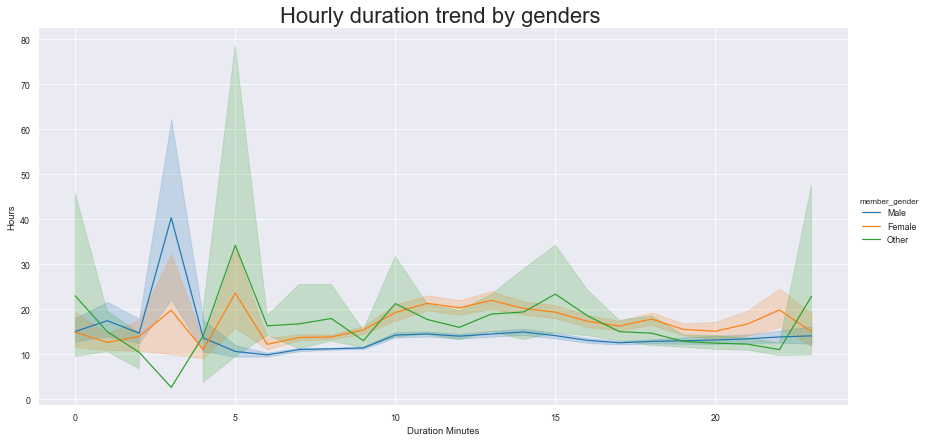

In [24]:
plt.figure(figsize = [20,20])
dur = sb.FacetGrid(data =  df_copy, hue = 'member_gender', size = 6, aspect= 2)
dur = dur.map(sb.lineplot, 'start_time_hour','duration_min')
dur.add_legend()


plt.title('Hourly duration trend by genders ', fontsize=22)
plt.xlabel('Duration Minutes')
plt.ylabel('Hours');
plt.savefig('img11.png');

- we can see that duration of men is more than women

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  From the above plot i can say that number of male subscribers more than numbers of women subscribers and male subscribers is more than customers male
> i can see now that the most customers users between 25 and 35 years and duration between 5 and 15 minutes
> we can see that duration of men is more than women

### Were there any interesting or surprising interactions between features?

> yes.. women rides duraion is less than man and most rides of customers between 5 and 15 minutes


## Summary of Findings

> after exploration i found the below summury:
 - the male use this activity more than women and kids
 - there are two type of users (customers and subscribers) which is subsribers riders is more than customers
 - subscribers use bikes during weekday may be as a work transportation,but customers do this activity in weekends.
 - the users prefere to do this activity in autumn because the weather is better than summer.
 - the most customers users between 25 and 35 years and duration between 5 and 15 minutes
